In [1]:
from susy_qm import create_vqe_plots
import os
import json

In [3]:
folder_path = r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\SUSY QM\PennyLane\VQE\Differential Evolution\RealAmplitudes\Noise"
#folder_path = r"C:\Users\johnkerf\Desktop\Quantum-Computing\Quantum-Computing\SUSY\SUSY QM\PennyLane\VQE\Differential Evolution\RY-CNOT-2shots"
folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

In [4]:
cut_off_list = [2, 4, 8, 16, 32, 64, 128, 256]#, 512]

for f in folders:
    path = os.path.join(folder_path, f) + "\\"
    potential = f

    create_vqe_plots(potential, path, cut_off_list, individual=True, converged_only=True)

Creating plots
Saving individual plot for cutoff 2
Saving individual plot for cutoff 4
Saving individual plot for cutoff 8
Saving individual plot for cutoff 16
Saving individual plot for cutoff 32
Saving individual plot for cutoff 64
Saving individual plot for cutoff 128
Saving individual plot for cutoff 256
Done
Creating plots
Saving individual plot for cutoff 2
Saving individual plot for cutoff 4
Saving individual plot for cutoff 8
Saving individual plot for cutoff 16
Saving individual plot for cutoff 32
Saving individual plot for cutoff 64
Saving individual plot for cutoff 128
Saving individual plot for cutoff 256
Done
Creating plots
Saving individual plot for cutoff 2
Saving individual plot for cutoff 4
Saving individual plot for cutoff 8
Saving individual plot for cutoff 16
Saving individual plot for cutoff 32
Saving individual plot for cutoff 64
Saving individual plot for cutoff 128
Saving individual plot for cutoff 256
Done


In [4]:
import matplotlib.pyplot as plt

In [ ]:
cut_off_list = [2, 4, 8, 16, 32]
for f in folders:

    data_list = []

    for cutoff in cut_off_list:
        path = os.path.join(folder_path, f, f"{f}_{cutoff}.json")
        
        with open(path, 'r') as file:
            data = json.load(file)

        data_list.append(data['results'])

    plt.figure(figsize=(15,10))
    plt.boxplot(data_list,
            tick_labels=cut_off_list,
            patch_artist=True,
            showmeans=True,  
            #notch=True,
            vert=False)       

    plt.title(f'{f} (With Shot Noise)')
    plt.xscale('symlog')
    plt.xlabel('VQE Groundstate Energy')
    plt.ylabel('Bosonic Modes ($\\Lambda$)')

    plt.grid(True, linestyle='--', alpha=0.7)

    save_path = os.path.join(folder_path, f, "boxplot.png")
    plt.savefig(save_path)


In [39]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatterSciNotation, FuncFormatter, ScalarFormatter

In [41]:
def log_tick_formatter(val, pos=None):
    if val == 0:
        return "0"
    exponent = int(np.log10(abs(val)))
    return r'$10^{{{}}}$'.format(exponent)


Text(0, 0.5, '')

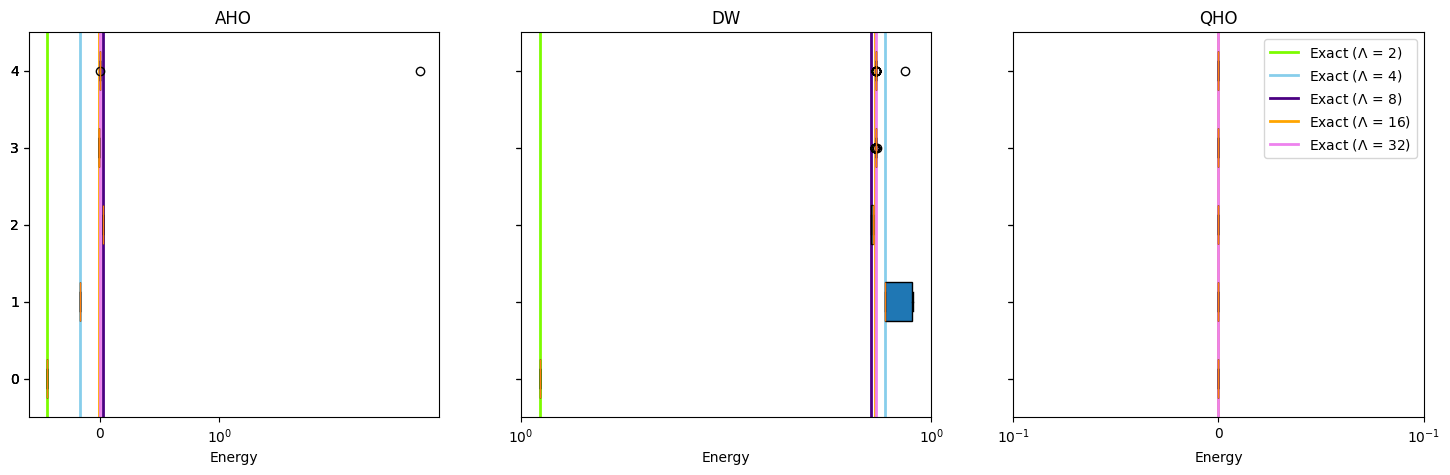

In [46]:
cut_off_list = [2, 4, 8, 16, 32]
colours = ['lawngreen', 'skyblue', 'indigo', 'orange', 'violet']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, potential in zip(axes, folders):

    box_data = []

    for colour, cutoff in zip(colours,cut_off_list):

        path = os.path.join(folder_path, potential, f"{potential}_{cutoff}.json")

        with open(path, 'r') as file:
            data = json.load(file)

        box_data.append(data['results'])
        min_e = min(data['exact_eigenvalues'])

        ax.axvline(min_e, color=colour, linewidth=2, label="Exact "+r'($\Lambda$ = {})'.format(cutoff))

    bp = ax.boxplot(box_data, patch_artist=True, notch=False, vert=False, positions=range(len(box_data)))

    ax.set_title(potential)
    ax.set_xlabel("Energy")
    
    ax.set_xscale("symlog")
    #ax.xaxis.set_major_locator(LogLocator(base=10.0))
    ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))


axes[2].legend()
axes[0].set_ylabel("") 

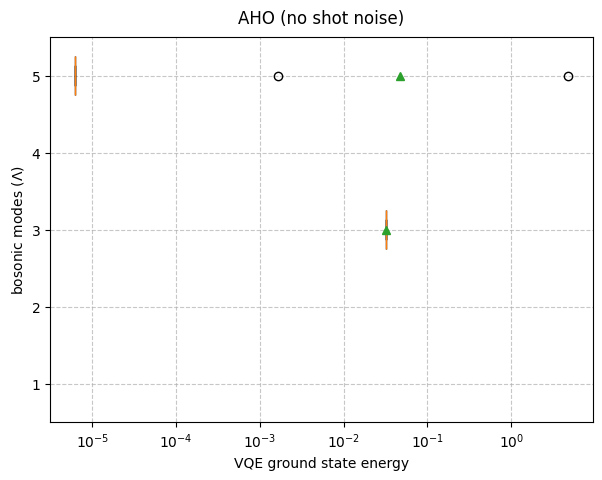

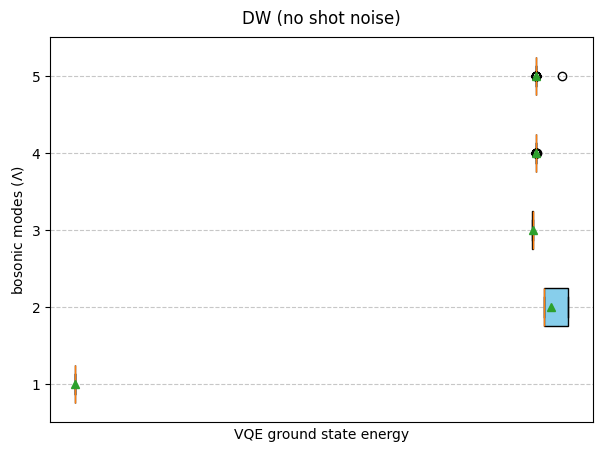

c:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


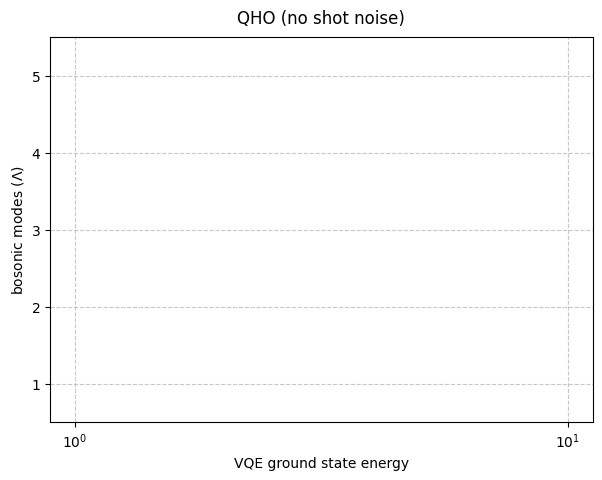

In [14]:
cut_off_list = [2, 4, 8, 16, 32]
colors = ['limegreen', 'skyblue', 'indigo', 'orange', 'hotpink']  # Match your color scheme

for f in folders:

    data_list = []

    for cutoff in cut_off_list:
        path = os.path.join(folder_path, f, f"{f}_{cutoff}.json")
        with open(path, 'r') as file:
            data = json.load(file)
        data_list.append(data['results'])

    plt.figure(figsize=(7, 5))
    box = plt.boxplot(
        data_list,
        patch_artist=True,
        showmeans=True,
        vert=False
    )

    # Apply custom colors to boxes
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.title(f'{f} (no shot noise)', pad=10)
    plt.xscale('symlog', linthresh=1e-15)  # Keep symlog scale with threshold
    plt.xlabel('VQE ground state energy')
    plt.ylabel('bosonic modes ($\\Lambda$)')

    # Power-of-10 ticks in scientific notation
    ax = plt.gca()
    ax.xaxis.set_major_locator(LogLocator(base=10.0, subs=(1.0,), numticks=10))
    ax.xaxis.set_major_formatter(LogFormatterSciNotation(labelOnlyBase=True))

    plt.grid(True, linestyle='--', alpha=0.7)

    save_path = os.path.join(folder_path, f, "boxplot.png")
    #plt.savefig(save_path, bbox_inches='tight', dpi=300)
    #plt.close()
    plt.show()
